In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matchms.importing import load_from_mgf
from matchms import calculate_scores
from matchms.similarity import CosineGreedy
from matchms.similarity import ModifiedCosine
pharma_file_mgf= "GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
natural_file_mgf= "GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf"
spectrumsPharma = list(load_from_mgf(pharma_file_mgf))
spectrumsNatural = list(load_from_mgf(natural_file_mgf))

In [22]:
import matchms.filtering as ms_filters

def metadata_processing(spectrum): 
    spectrum = ms_filters.default_filters(spectrum) 
    spectrum = ms_filters.add_precursor_mz(spectrum) 
    return spectrum 


def peak_processing(spectrum): 
    spectrum = ms_filters.default_filters(spectrum) 
    spectrum = ms_filters.normalize_intensities(spectrum) 
    spectrum = ms_filters.select_by_intensity(spectrum, intensity_from=0.01) 
    spectrum = ms_filters.select_by_mz(spectrum, mz_from=10, mz_to=1000) 
    return spectrum

In [23]:
numbers_of_peaks_pharma = [len(s.peaks.mz) for s in spectrumsPharma]
numbers_of_peaks_natural = [len(s.peaks.mz) for s in spectrumsNatural]

In [24]:
spectrums_pharma_processed = [metadata_processing(s) for s in spectrumsPharma]
spectrums_pharma_processed = [peak_processing(s) for s in spectrums_pharma_processed]

In [25]:
spectrums_natural_processed = [metadata_processing(s) for s in spectrumsNatural]
spectrums_natural_processed = [peak_processing(s) for s in spectrums_natural_processed]

In [26]:
numbers_of_peaks_pharma_processed = [len(s.peaks.mz) for s in spectrums_pharma_processed]
numbers_of_peaks_natural_processed = [len(s.peaks.mz) for s in spectrums_natural_processed]

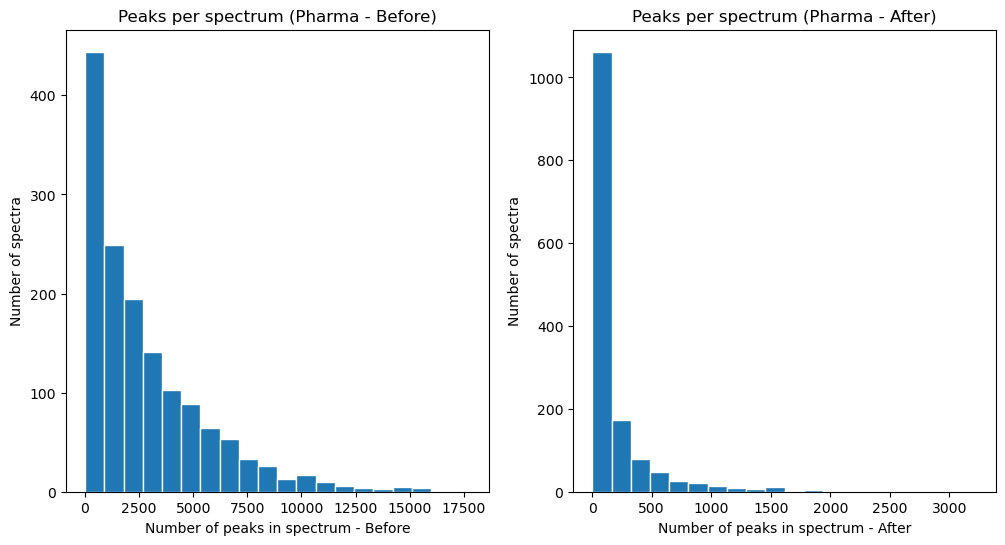

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,6), dpi = 100)
ax[0].hist(numbers_of_peaks_pharma, 20, edgecolor="white")
ax[0].set_title("Peaks per spectrum (Pharma - Before)")
ax[1].hist(numbers_of_peaks_pharma_processed, 20, edgecolor="white")
ax[1].set_title("Peaks per spectrum (Pharma - After)")
ax[0].set_xlabel("Number of peaks in spectrum - Before")
ax[1].set_xlabel("Number of peaks in spectrum - After")
ax[0].set_ylabel("Number of spectra")
ax[1].set_ylabel("Number of spectra")
plt.show()

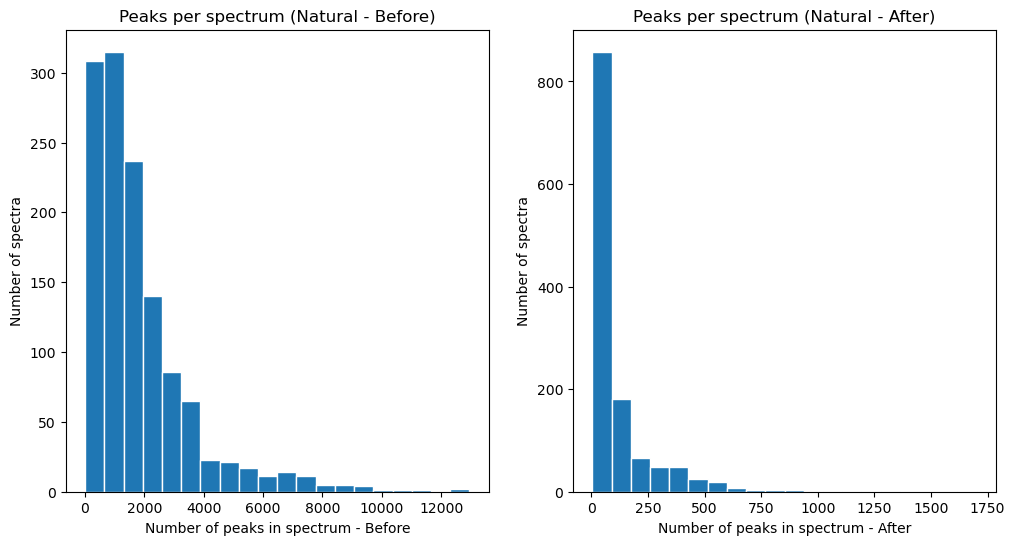

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,6), dpi = 100)
ax[0].hist(numbers_of_peaks_natural, 20, edgecolor="white")
ax[0].set_title("Peaks per spectrum (Natural - Before)")
ax[1].hist(numbers_of_peaks_natural_processed, 20, edgecolor="white")
ax[1].set_title("Peaks per spectrum (Natural - After)")
ax[0].set_xlabel("Number of peaks in spectrum - Before")
ax[1].set_xlabel("Number of peaks in spectrum - After")
ax[0].set_ylabel("Number of spectra")
ax[1].set_ylabel("Number of spectra")
plt.show()

In [37]:
similarity_measure_greedy = CosineGreedy(tolerance = 0.025)
similarity_measure_Mod = ModifiedCosine(tolerance = 0.025)

In [38]:
def evaluate_matrix(s1, s2, similarity_measure):
    sim_score = []
    matched_peaks = []
    for sn in s2:
        sim_score_ = []
        matched_peaks_ = []
        for sph in s1:
            score1 = similarity_measure.pair(sph, sn)
            sim_score_.append(score1["score"])
            matched_peaks_.append(score1["matches"])
        sim_score.append(sim_score_)
        matched_peaks.append(matched_peaks_)

    sim_score = np.array(sim_score)
    matched_peaks = np.array(matched_peaks)
    return [sim_score, matched_peaks]

In [39]:
[score_greedy, peaks_greedy] = evaluate_matrix(spectrums_natural_processed[:1266], spectrums_pharma_processed[:1266], similarity_measure_greedy)

In [40]:
[score_mod, peaks_mod] = evaluate_matrix(spectrums_natural_processed[:1266], spectrums_pharma_processed[:1266], similarity_measure_Mod)

In [41]:
print(score_greedy)
len(score_greedy)

[[0.08337524 0.01828103 0.00602564 ... 0.021644   0.02297623 0.1903664 ]
 [0.058948   0.00466623 0.00317057 ... 0.01374392 0.00105109 0.03734118]
 [0.01943235 0.01380553 0.05048435 ... 0.00043285 0.         0.03276432]
 ...
 [0.06684037 0.04010092 0.01125147 ... 0.02028466 0.02541132 0.15253742]
 [0.00031503 0.01533124 0.00023257 ... 0.00290355 0.         0.02100541]
 [0.0008748  0.0521887  0.00070477 ... 0.00895284 0.02521435 0.01561866]]


1266

In [42]:
print(peaks_greedy)

[[ 19  32   9 ...  20  22 123]
 [  6   7   6 ...   8   3  24]
 [  3   3   5 ...   2   0  25]
 ...
 [ 15  21  14 ...  15  15  98]
 [  1   3   1 ...   1   0  11]
 [  1   2   1 ...   4   4   8]]


In [43]:
print(score_mod)

[[0.08741353 0.02634552 0.05171051 ... 0.05170008 0.02657714 0.19267755]
 [0.058948   0.01040209 0.00448692 ... 0.01482308 0.00105109 0.03734118]
 [0.01943235 0.02122528 0.0742316  ... 0.00256471 0.00062603 0.03276432]
 ...
 [0.07067704 0.04335774 0.01968892 ... 0.04039092 0.02612853 0.15493813]
 [0.01572683 0.01533124 0.00023257 ... 0.00336889 0.         0.02100541]
 [0.0008748  0.05543611 0.13595498 ... 0.00895284 0.04803552 0.01561866]]


In [44]:
print(peaks_mod)

[[ 23  45  21 ...  29  26 130]
 [  6  14   7 ...   9   3  24]
 [  3   9  10 ...   3   1  25]
 ...
 [ 19  32  20 ...  21  18 104]
 [  2   3   1 ...   3   0  11]
 [  1   3   4 ...   4   6   8]]


In [10]:
import gensim
import os
path_model = os.path.join(os.path.dirname(os.getcwd()),"CEU")
filename = os.path.join(path_model, "spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model")
model = gensim.models.Word2Vec.load(filename)
model.wv.index_to_key[0]

'peak@105.07'

In [11]:
from spec2vec import Spec2Vec
spec2vec_similarity = Spec2Vec(model=model, intensity_weighting_power=0.5, allowed_missing_percentage=5.0)

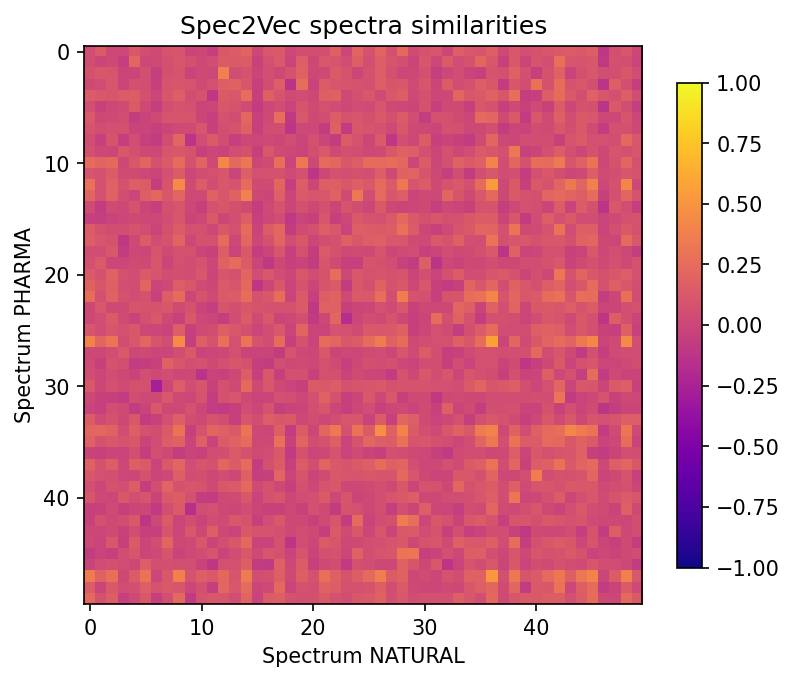

In [12]:
from matchms import calculate_scores
scores = calculate_scores(spectrums_natural_processed, spectrums_pharma_processed, spec2vec_similarity)
scores_array = scores.scores.to_array()
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores_array[:50, :50], cmap="plasma")
plt.colorbar(shrink=0.7)
plt.title("Spec2Vec spectra similarities")
plt.xlabel("Spectrum NATURAL")
plt.ylabel("Spectrum PHARMA")
plt.clim(-1, 1)

In [13]:
scores_array = scores.scores.to_array()  # for matchms >= 0.18.0
print (scores_array[:8,:8])

[[ 0.05383204  0.13972912  0.01189183  0.01418767  0.12244239  0.0416963
   0.02747177  0.09152828]
 [ 0.04759476 -0.00608433  0.03020303 -0.05400686  0.2069743   0.00996051
   0.02839293  0.06775726]
 [ 0.08471002  0.11075825  0.10106716 -0.00953928 -0.00118183  0.05595534
  -0.04899503  0.07607847]
 [ 0.02551789  0.04345199  0.10847599 -0.00646196  0.07537547  0.05875687
  -0.04222722  0.09798684]
 [ 0.14778672  0.11559945  0.10200027  0.14603244  0.14961076  0.07364805
   0.00567533  0.10408052]
 [ 0.05770441 -0.02622728  0.02327867  0.03262255  0.13470561  0.0247862
  -0.05455162  0.05995865]
 [ 0.12566381  0.02026998  0.02702975  0.04626135 -0.05940406 -0.01678315
   0.02961767  0.10017146]
 [ 0.09086893  0.04982435  0.06519651  0.07628391 -0.01145353 -0.01314556
  -0.0452918  -0.00594366]]


In [14]:
from spec2vec import SpectrumDocument
spectrum_document = SpectrumDocument(spectrums_natural_processed[0], n_decimals=3)
print(spectrum_document.peaks.mz)


[103.050735 106.066605 107.048851 109.213432 115.056068 117.551163
 128.736877 130.065247 131.06958  132.081299 133.084671 135.045059
 142.067581 144.079712 158.060226 159.06514  160.076172 160.315445
 168.299896 175.085663 180.319534 184.745377 186.091202 186.995636
 187.086578 188.089447 201.10257  203.081558 204.084549 215.080795
 216.083893 217.083862 229.095978 230.104477 233.094818 234.093719
 235.481415 245.090179 257.091827 258.094238]


In [15]:
#FOR IMPLEMENT OUR CREATED MODEL (NOT THE PROJECT)
path_model = os.path.join(os.path.dirname(os.getcwd()),"CEU")
filename = os.path.join(path_model, "NOELIA_Model.model")
model_NOE = gensim.models.Word2Vec.load(filename)

In [68]:
from spec2vec import Spec2Vec
spec2vec_similarity_NOE = Spec2Vec(model=model_NOE, intensity_weighting_power=0.5, allowed_missing_percentage=15.0)

2024-05-22 18:31:29,763:WARNING:spec2vec:vector_operations:('Missing percentage (29.23%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')
2024-05-22 18:31:29,764:WARNING:spec2vec:vector_operations:('Missing percentage (38.34%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')
2024-05-22 18:31:29,765:WARNING:spec2vec:vector_operations:('Missing percentage (27.54%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')
2024-05-22 18:31:29,768:WARNING:spec2vec:vector_operations:('Missing percentage (17.29%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')
2024-05-22 18:31:29,775:WARNING:spec2vec:vector_operations:('Missing percentage (24.

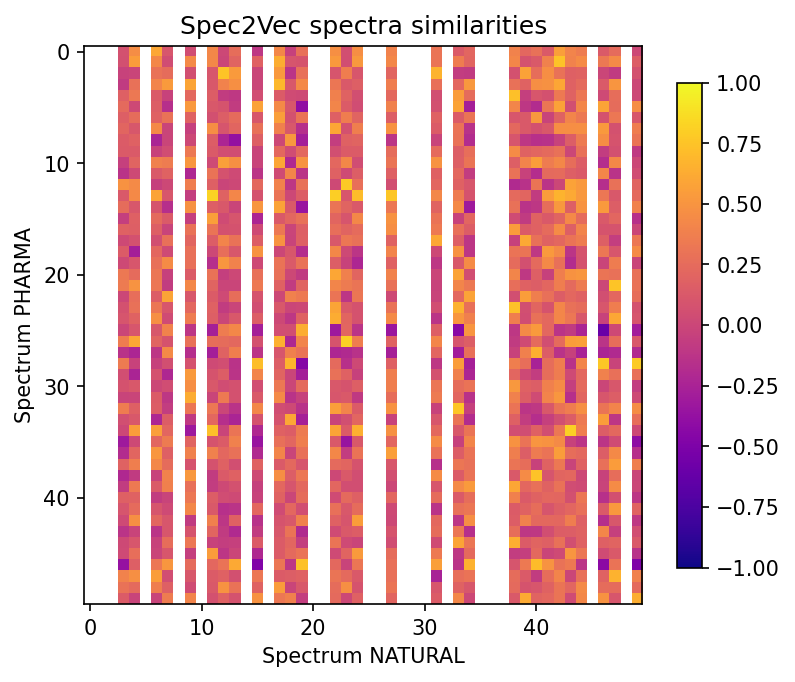

In [69]:
from matchms import calculate_scores
scores = calculate_scores(spectrums_natural_processed, spectrums_pharma_processed, spec2vec_similarity_NOE)
scores_array = scores.scores.to_array()
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores_array[:50, :50], cmap="plasma")
plt.colorbar(shrink=0.7)
plt.title("Spec2Vec spectra similarities")
plt.xlabel("Spectrum NATURAL")
plt.ylabel("Spectrum PHARMA")
plt.clim(-1, 1)